# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [292]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [293]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [294]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [295]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [296]:
# Extract all rows of data
all_data = soup.find("table")
all_rows = all_data.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [297]:
# Create an empty list
data = []

# Loop through the scraped data to create a list of rows
for row in all_rows:
    column = row.find_all(['th', 'td'])
    columns = [col.text.strip() for col in column]
    data.append(columns)

In [298]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_df = pd.DataFrame(data, columns=column_names)

In [299]:
# Confirm DataFrame was created successfully
mars_df = mars_df.iloc[1:]
mars_df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1,2,2012-08-16,10,155,6,-75.0,739.0
2,13,2012-08-17,11,156,6,-76.0,740.0
3,24,2012-08-18,12,156,6,-76.0,741.0
4,35,2012-08-19,13,157,6,-74.0,732.0
5,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [300]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [301]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [302]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [303]:
# 1. How many months are there on Mars?
months_on_mars = mars_df['month'].nunique()
months_on_mars

12

In [304]:
# 2. How many sols (Martian days) worth of data are there?
martian_days = mars_df['sol'].count()
martian_days

1867

In [305]:
# 3. What is the average minimum temperature by month?
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

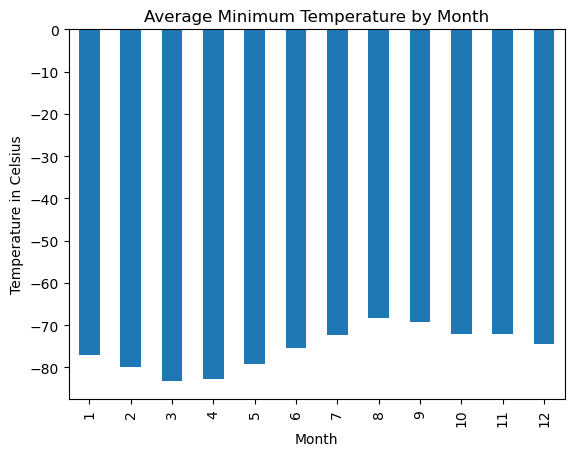

In [306]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.show()

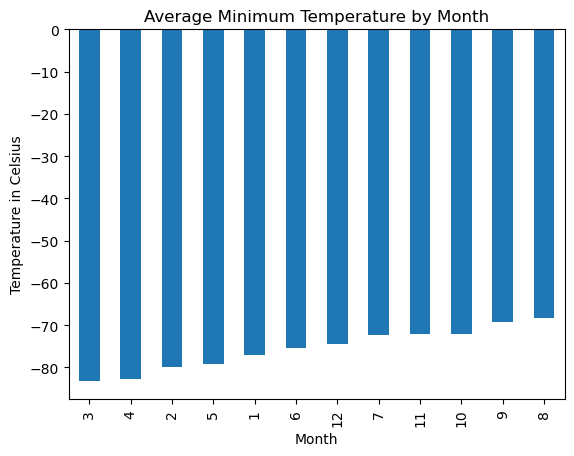

In [307]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
new_avg_min_temp = avg_min_temp.sort_values(ascending=True)
new_avg_min_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.title('Average Minimum Temperature by Month')
plt.show()

In [308]:
# 4. What is the average pressure by month?
avg_pressure = mars_df.groupby('month')['pressure'].mean()

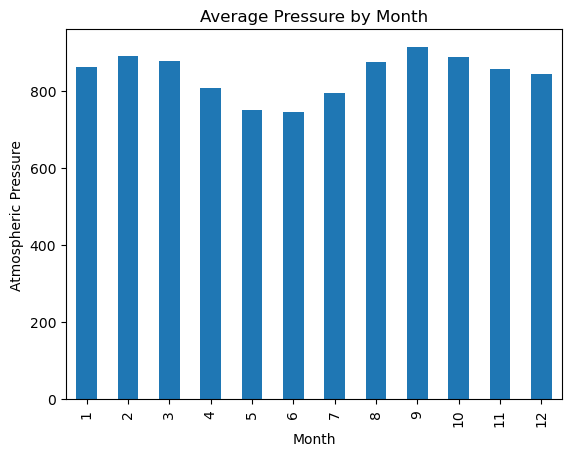

In [309]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()

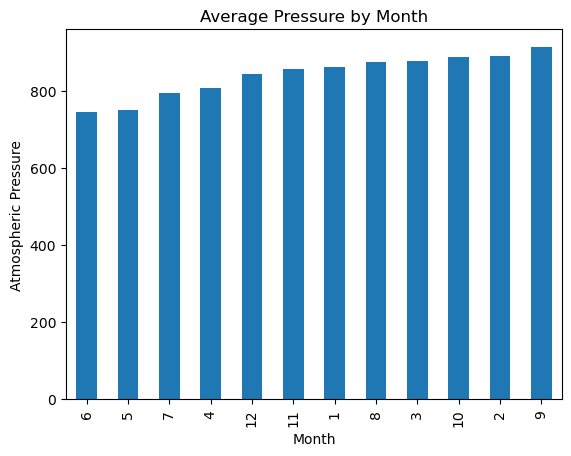

In [310]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
new_avg_pressure = avg_pressure.sort_values(ascending=True)
new_avg_pressure.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')
plt.show()

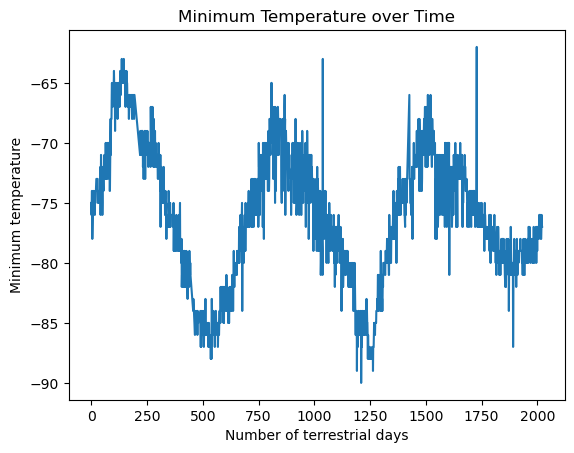

In [311]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df['terrestrial_date'] = (mars_df['terrestrial_date'] - mars_df['terrestrial_date'].min()).dt.days
plt.plot(mars_df['terrestrial_date'], mars_df['min_temp'], label='Min Temp')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum temperature')
plt.title('Minimum Temperature over Time')
plt.show()


#### Minimum Temperature

Referencing the Average Temperature by month bar graph we can note that month 3 is the coldest month on plant Mars and month 8 is the warmest month. 

#### Atmospheric Pressure
Observing the Average Pressure by month bar graph we can identify that month 6 has the lowest atomospheric pressure, while month 9 has the highest atmospheric pressure. 


#### Year Length
Based on the Minimum Temperature over time graph we can observe that there is a cyclical pattern occuring suggesting that seasons may be present on Mars due to the periodic and repetitive rises and drops in temperature also indicating the duration of a year on Mars being approximately 600-700 terrestrial days.  


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [312]:
# Write the data to a CSV
mars_df.to_csv('mars_df.csv', header=True, index=True)

In [313]:
browser.quit()